---
### Project: Clean And Analyze Employee Exit Surveys
---

In this project we will analyse reasons for employees leaving the Department of Education, Training and Employment (DETE) and Technical and Further Eduction institute (TAFE) in Queensland, Australia. 

It will considers:
* If employees who resigned after a short time leaving due to some dissatisfaction. 
* If so, how does that compare to longer serving employees. 
* Are younger employees resigning for some negative reason, how do they compare to older employees. 

A data dictionary wasn't provided with the dataset.

In [1]:
import numpy as np, pandas as pd

In [2]:
dete = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe = pd.read_csv('tafe_survey.csv', na_values = 'Not Stated')

In [3]:
# Remove unrequired columns
dete = dete.drop(dete.columns[28:49], axis = 1)
tafe = tafe.drop(tafe.columns[17:66], axis = 1)

--- 
#### Inspect Data

In [4]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

---
#### Tidy column names

In [6]:
dete.columns = dete.columns.str.replace(' ','_').str.strip().str.lower()
dete.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe = tafe.rename(columns = {'Record ID':'id', 'CESSATION YEAR': 'cease_date', 
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
            })

---

#### Explore the Data
---

In [8]:
dete['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
dete = dete[(dete['separationtype'] == 'Resignation-Other reasons') | 
     (dete['separationtype'] == 'Resignation-Other employer') |
     (dete['separationtype'] =='Resignation-Move overseas/interstate')
    ]
dete.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe = tafe[tafe['separationtype'] == 'Resignation']
tafe.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


The data has now been filtered down to contain only the resignation cases.

---
#### Clean Data
---

In [12]:
# Check the values
dete['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [13]:
tafe['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [14]:
# Clean the DETE dates, TAFE dates are suitable, convert both to float
tafe['cease_date'] = tafe['cease_date'].astype(float)
dete['dete_start_date'] = dete['dete_start_date'].astype(float)
dates = dete['cease_date'].unique()

clean_dates = {}
for i in dates:
    if len(str(i)) > 4:
        j = i[-4:]
    else:
        j = i
    float(j)
    x = {i:j}
    clean_dates.update(x)
dete['cease_date'] = dete['cease_date'].map(clean_dates).astype(float)

---
#### Duration of employment 
---

In [15]:
tafe['institute_service'] = tafe['institute_service'].str.extract(r"(\d+)").astype(float)
tafe['institute_service'].value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service, dtype: int64

In [16]:
dete['institute_service'] = dete['cease_date'] - dete['dete_start_date']
dete['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [17]:
dete_reasons = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                'physical_work_environment', 'lack_of_recognition', 
                'lack_of_job_security', 'work_location', 
                'employment_conditions', 'work_life_balance', 'workload']

for col in dete_reasons:
    print(dete[col].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [18]:
# If any of the following reasons are True then we count them as dissatisfied

tafe_reasons = ['Contributing Factors. Dissatisfaction',
               'Contributing Factors. Job Dissatisfaction']

for col in tafe_reasons:
    print(tafe[col].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [19]:
# Update function for TAFE data
def update_vals(val):
        if pd.isnull(val):
            return np.nan
        elif val == '-':
            return False
        else:
            return True

In [20]:
tafe.loc[:, 'dissatisfied'] = (
    tafe[tafe_reasons].applymap(update_vals).any(axis=1, skipna=False))

tafe['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [21]:
dete['dissatisfied'] = dete[dete_reasons].any(axis = 1, skipna = False)
dete['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [22]:
dete = dete.copy()
tafe = tafe.copy()

At this point we have:
 - renamed our columns
 - dropped unrequired data
 - verified the quality of the data
 - created a service length column (institute service)
 - cleaned the contributing factors columns
 - added a column to indicate whether an employee was dissatisfied

---
#### Combine Datasets
---

In [23]:
dete['institute'] = 'DETE'
tafe['institute'] = 'TAFE'

combined = pd.concat([dete, tafe], ignore_index = True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [24]:
# drop cols with < 500 non-nulls

combined = combined.dropna(thresh = 500, axis = 1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(3), object(7)
memory usage: 51.0+ KB


In [25]:
def experience(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return 'veteran'
    elif val >= 7:
        return 'established'
    elif val >= 3:
        return 'experienced'
    else:
        return 'new'

combined['service_cat'] = combined['institute_service'].apply(experience)
combined['service_cat'].value_counts()

new            193
experienced    172
veteran        136
established     62
Name: service_cat, dtype: int64

In [26]:
combined['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

The data has now been:
- combined into a single dataframe
- columns with less than 500 non-nulls dropped
- employees have been catagorised on years of service
    - less than 3 is classed as new for this analysis
- where there is no value for dissatisfied then it has been assigned to the majority class, in this case False, which may be wrong but only 8 of 651 fell into this catagory so will not significantly impact the analysis. 

In [28]:
pivot = pd.pivot_table(combined, values = 'dissatisfied', index =  'service_cat')
pivot['dissatisfied']

service_cat
established    0.516129
experienced    0.343023
new            0.295337
veteran        0.485294
Name: dissatisfied, dtype: float64

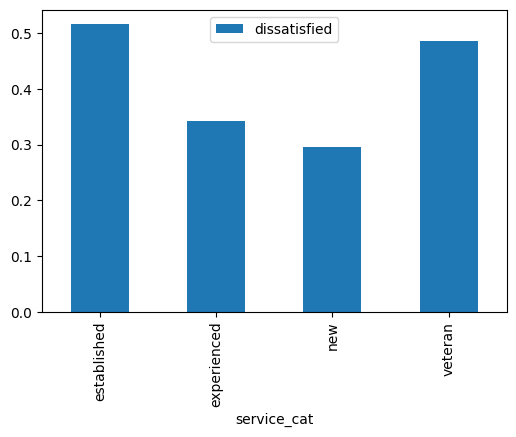

In [29]:
%matplotlib inline
pivot.plot( kind = 'bar')

In this project we have gathered, cleaned and prepared the data for analysis. 

We have completed the analysis of rates of employees leaving due to dissatisfaction across four catagories:
    - Veteran - >11yrs service
    - Established - >7yrs service
    - Experienced - >3yrs service
    - New - <3yrs sercvice

As the results show there is a greter proportion of verteran and established employees leaving due to dissatisfaction as compared to the new and experienced groups. 

From this initial analysis of responses available the newer the employee the less likely they are to leave due to dissatisfaction. 